In [1]:
import numpy as np
from auxiliary.tauchen import approx_markov
from auxiliary.FirmInvestmentModel import FirmInvestmentModel, solve_model_notreshaped
from auxiliary.helpers_plotting import line_plot, threedim_plot

In [2]:
# Initialization for the creation of the mgrid (that uses the not-jittable function above and hence is created outside the class def)
seed = 10082021

nz = 11         # Number of grid points for TFP
emean = 0.0     # Mean of innovations to firm TFP
sigma_z = 0.15  # Standard Deviations of innovations
rho = 0.7       # TFP persistence
multiple = 2.575 # Number of standard deviations the grid should span

# Productivity shock grid and transition probability matrix
np.random.seed(seed)
mgrid, pr_mat_m = approx_markov(rho, sigma_z, multiple, nz)
mgrid = np.exp(mgrid)

In [3]:
# Test
terry = FirmInvestmentModel(
            alpha=0.5,          
            delta=0.05,
            mgrid=mgrid,
            pr_mat_m=pr_mat_m)

In [4]:
 # Test
 V, polind, pol, equity_iss = solve_model_notreshaped(terry)

 V = np.reshape(V, (terry.nz, terry.nk))
 polind = np.reshape(polind, (terry.nz, terry.nk))
 pol = np.reshape(pol, (terry.nz, terry.nk))
 equity_iss = np.reshape(equity_iss, (terry.nz, terry.nk))

25 ( 0.0001867032661664325  error)

Converged in 27  iterations.


In [5]:

def visualize(alpha, delta, mgrid, pr_mat_m):
    """
    Visualizes the model solution (in 2D and 3D) taking alpha and delta as input for instantiating the class FirmInvestmentModel.

    Input
    -----
    * alpha:    parameter of interest (capital's share of output)
    * delta:    parameter of interest (depreciation rate)
    
    Output
    ------
    plots
    """
    
    # Create instance of the class FirmInvestmentModel
    terry = FirmInvestmentModel(alpha=alpha, delta=delta, mgrid=mgrid, pr_mat_m=pr_mat_m)

    # Solve the model
    V, polind, pol, equity_iss = solve_model_notreshaped(terry)

    # Reshape
    V = np.reshape(V, (terry.nz, terry.nk))
    polind = np.reshape(polind, (terry.nz, terry.nk))
    pol = np.reshape(pol, (terry.nz, terry.nk))
    equity_iss = np.reshape(equity_iss, (terry.nz, terry.nk))

    # Create contour lines
    line_plot(terry.kvec, V, terry.nz, 'Firm Capital k', 'V(z,k)', "Firm Value, (alpha, delta) = ({}, {})".format(alpha, delta))
    line_plot(terry.kvec, pol, terry.nz, 'Firm Capital k', 'kprime(z,k)', "Firm Capital Choice, (alpha, delta) = ({}, {})".format(alpha, delta))
    line_plot(terry.kvec, equity_iss, terry.nz, 'Firm Capital k', 'Negative Part(Equity Issuance)', "Firm Equity Issuance, (alpha, delta) = ({}, {})".format(alpha, delta))

    # Create 3D plots
    threedim_plot(terry.mgrid, terry.kvec, V, "z", "k", "V(z,k)", "Firm Value, (alpha, delta) = ({}, {})".format(alpha, delta))
    threedim_plot(terry.mgrid, terry.kvec, pol, "z", "k", "kprime(z,k)", "Firm Capital Choice, (alpha, delta) = ({}, {})".format(alpha, delta))
    threedim_plot(terry.mgrid, terry.kvec, equity_iss, "z", "k", "Negative Part(Equity Issuance)", "Negative Part(Equity Issuance), (alpha, delta) = ({}, {})".format(alpha, delta))
    


25 ( 0.0001867032661664325  error)

Converged in 27  iterations.


NameError: name 'nz' is not defined

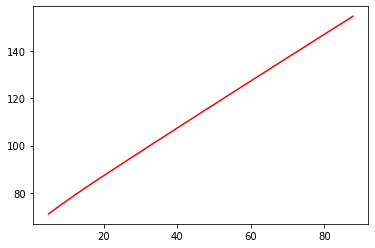

In [6]:
visualize(alpha=0.5, delta=0.05, mgrid=mgrid, pr_mat_m=pr_mat_m)